In [ ]:
import PRF
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = np.load('../data/bootstrap_X.npy')
dX = np.load('../data/bootstrap_dX.npy')
y = np.load('../data/bootstrap_y.npy')
#y[y > 2] = 2               #TODO: Why do they keep only two classes?

print("X: ", X)
print("Xd: ", dX)
print("y: ", y)
print("labels: ", set([int(i) for i in y]))

n_objects = X.shape[0]
n_features = X.shape[1]
print(n_objects, 'objects,', n_features, 'features')

X:  [[ 0.33453338  0.3817734   0.19323093 ... -0.81191589  0.19067206
   0.84772759]
 [ 0.32742773  0.35012285  0.17785153 ... -0.85643206  0.19620735
   0.85023905]
 [ 0.39173798  0.32019704  0.17513842 ...  0.23618577  0.20204299
   0.79843681]
 ...
 [ 0.403697    0.27038462  0.12964029 ...  0.89465122  0.1941173
   0.77770493]
 [ 0.25029907  0.33824084  0.20026945 ...  0.8638979   0.14645717
   0.82934586]
 [ 0.27610644  0.34        0.16186233 ... -0.52845195  0.15704813
   0.83015366]]
Xd:  [[0.00980023 0.01298663 0.01730336 ... 0.07554966 0.00503042 0.00614086]
 [0.0099433  0.01547131 0.01834346 ... 0.06557894 0.00303583 0.00408301]
 [0.00952382 0.00953937 0.0162304  ... 0.15137843 0.00276635 0.00701187]
 ...
 [0.01547352 0.01519596 0.02114385 ... 0.23644937 0.00473304 0.01679457]
 [0.00721856 0.01831125 0.01688584 ... 0.81714142 0.00310632 0.01113628]
 [0.00577725 0.01198521 0.01370714 ... 0.07905823 0.00147411 0.00798292]]
y:  [5 1 4 ... 1 5 1]
labels:  {1, 2, 3, 4, 5, 6, 7, 8, 

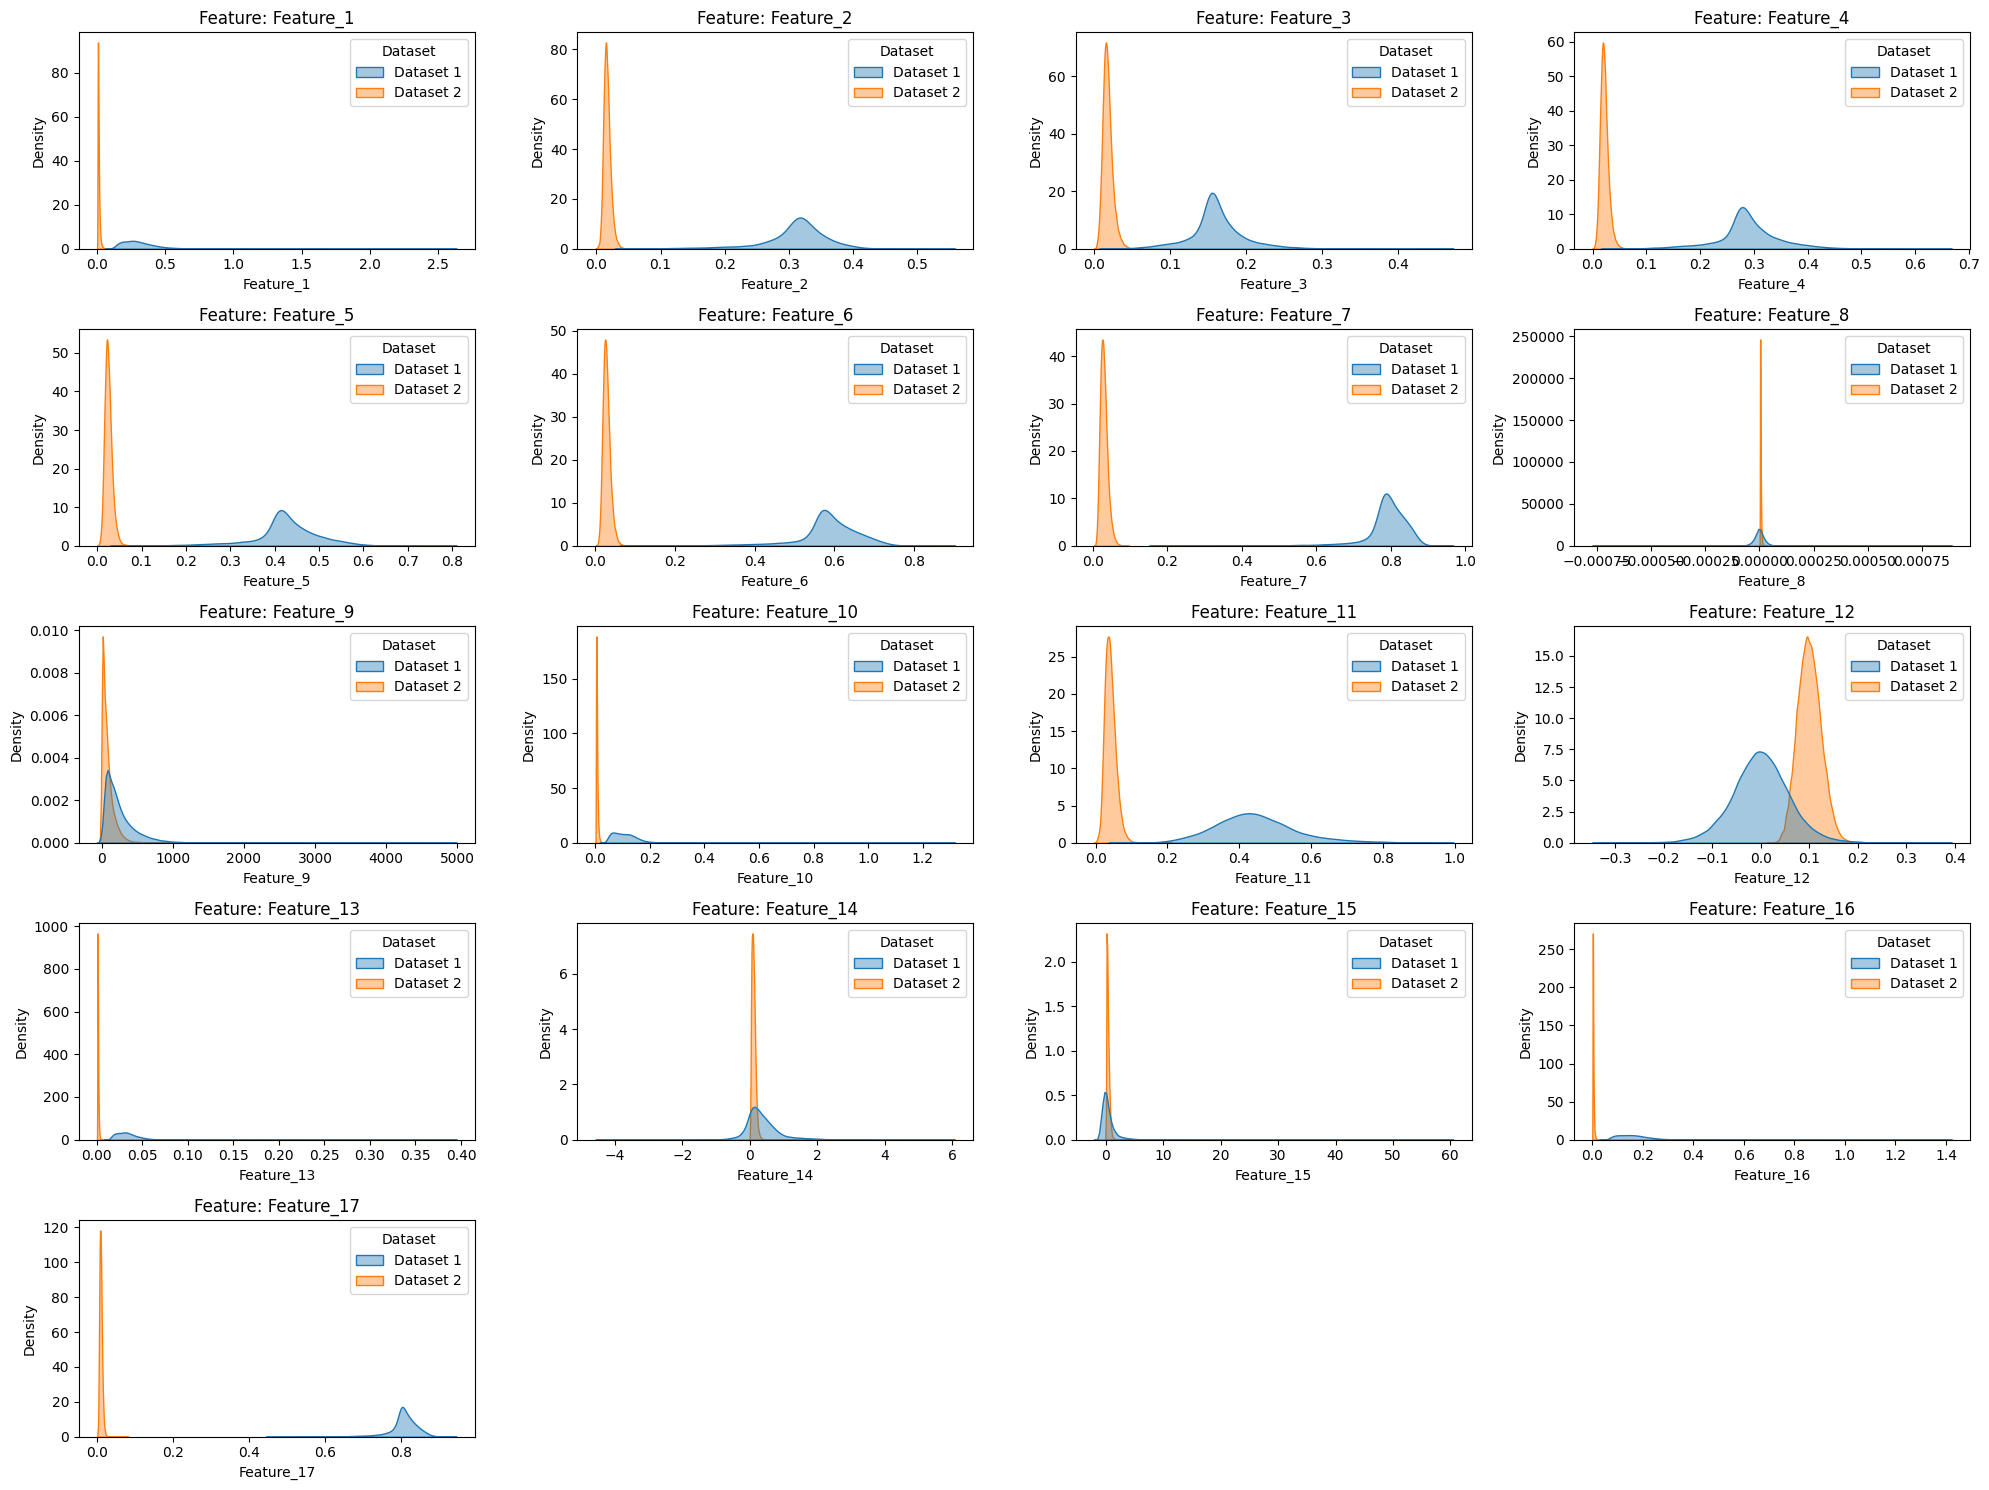

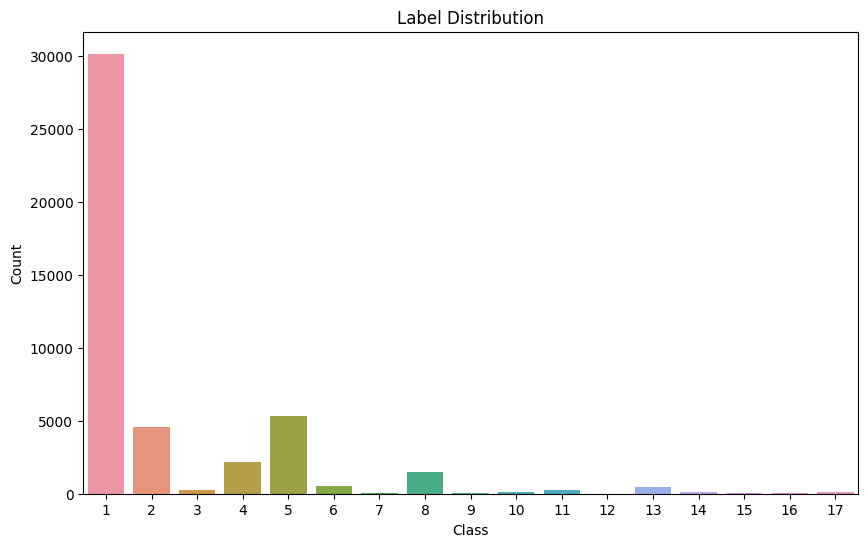

In [ ]:
feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]

df1 = pd.DataFrame(X, columns=feature_names)
df1['Label'] = y
df1['Dataset'] = 'X'

df2 = pd.DataFrame(dX, columns=feature_names)
df2['Dataset'] = 'dX'

# Combine both for easier plotting
df_all = pd.concat([df1, df2], ignore_index=True)

# Plot distributions of each feature side by side
plt.figure(figsize=(20, 15))
for i, feature in enumerate(feature_names):
    plt.subplot(5, 4, i + 1)
    sns.kdeplot(data=df_all, x=feature, hue='Dataset', common_norm=False, fill=True, alpha=0.4)
    plt.title(f"Feature: {feature}")
plt.tight_layout()
plt.show()

# Plot label distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df1, order=sorted(df1['Label'].unique()))
plt.title("Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [11]:
shuffled_inds = np.random.choice(np.arange(n_objects),n_objects,replace=False)

#shuffled_inds = numpy.where( (y == 1)  |  (y == 2) |  (y == 4)|  (y == 5)|  (y == 6)|  (y == 8)|  (y == 13))[0]        # TODO: Why?
#shuffled_inds = numpy.random.choice(shuffled_inds,len(shuffled_inds),replace=False)
n_train = 5000
n_test = 500
print('Train set size = {}, Test set size = {}'.format(n_train, n_test))

nf = n_features
train_inds = shuffled_inds[:n_train]
X_train = X[train_inds][:,:nf]
y_train = y[train_inds]

test_inds = shuffled_inds[n_train:(n_train + n_test)]
X_test = X[test_inds][:,:nf]
y_test = y[test_inds]

Train set size = 5000, Test set size = 500


In [4]:
n_trees = 10
prf_cls = PRF.prf(n_estimators=n_trees,  bootstrap=True)
prf_cls.fit(X=X_train, y=y_train)
score = prf_cls.score(X_test, y=y_test)
print('Score: ', score)

Score:  0.766
